In [1]:
import json
import plotly
import numpy as np
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
plotly.offline.init_notebook_mode(connected=True)

In [3]:
%matplotlib inline

# IMDB Dataset

In [4]:
with open("database/imdb.json") as fp:
    instances = json.load(fp)

In [5]:
# graph 1: year x count
graph1 = {}

for instance in instances:
    if instance["year"] in graph1:
        graph1[instance["year"]] += 1
    else:
        graph1[instance["year"]] = 1

graph1 = [(x, y) for x, y in graph1.items()]
graph1 = sorted(graph1)

In [6]:
graph = go.Bar(
    x=[x for x, _ in graph1], 
    y=[y for _, y in graph1],
    hovertext="filmes",
    marker=dict(
        color="purple"
    ),
)

layout = go.Layout(
    title="Quantidade de filmes e séries por ano",
    xaxis=dict(
        title="Ano",
        showgrid=True,
        dtick=4,
        ticklen=3,
    ),
    yaxis=dict(
        title="Quantidade",
        range=[0, max([int(y) for _, y in graph1]) + 10],
        dtick=45,
    )
)

fig = go.Figure(data=[graph], layout=layout)
plotly.offline.iplot(fig)
plotly.offline.plot(fig, filename="imdb_year_count/index.html", auto_open=False)

'imdb_year_count/index.html'

In [7]:
# graph2: year x genre x count
graph2 = []

genres = set()
year = set()

for instance in instances:
    for g in instance["genres"]:
        genres.add(g)
    year.add(instance["year"])
    
genres = list(sorted(genres))
year = list(sorted(year))

graph2 = np.zeros((len(genres), len(year)))

for instance in instances:
    for genre in instance["genres"]:
        graph2[genres.index(genre)][year.index(instance["year"])] += 1

In [8]:
graph = go.Heatmap(
    z=graph2, 
    x=year,
    y=genres,
    colorscale = "Viridis"
)

layout = go.Layout(
    title="Quantidade de filmes e séries por gênero e ano",
    xaxis=dict(
        range=[min(year), max(year)],
        title="Ano",
        dtick=4,
        ticklen=3,
    ),
    yaxis=dict(
        title="Gênero",
    )
)

fig = go.Figure(data=[graph], layout=layout)
plotly.offline.iplot(fig)
plotly.offline.plot(fig, filename="imdb_year_genre_count/index.html", auto_open=False)

'imdb_year_genre_count/index.html'

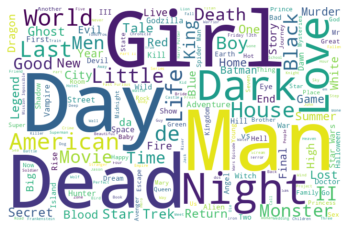

In [9]:
# graph 3: word cloud
text = ""

for instance in instances:
    text += instance["title"] + " "

wordcloud = WordCloud(max_words=200, mode="RGBA", background_color="white", width=700, height=450).generate(text)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

wordcloud.to_file("img/imdb_wordcloud.png")

# MyAnimeList Dataset

In [10]:
with open("database/mal.json") as fp:
    instances = json.load(fp)

In [11]:
# graph 1: year x count
graph1 = {}

for instance in instances:
    if instance["year"] in graph1:
        graph1[instance["year"]] += 1
    else:
        graph1[instance["year"]] = 1

graph1 = [(x, y) for x, y in graph1.items()]
graph1 = sorted(graph1)

In [12]:
graph = go.Bar(
    x=[x for x, _ in graph1], 
    y=[y for _, y in graph1],
    hovertext="animações",
    marker=dict(
        color="purple"
    ),
)

layout = go.Layout(
    title="Quantidade de animações por ano",
    xaxis=dict(
        title="Ano",
        showgrid=True,
        dtick=4,
        ticklen=3,
    ),
    yaxis=dict(
        title="Quantidade",
        range=[0, max([int(y) for _, y in graph1]) + 10],
        dtick=45,
    )
)

fig = go.Figure(data=[graph], layout=layout)
plotly.offline.iplot(fig)
plotly.offline.plot(fig, filename="mal_year_count/index.html", auto_open=False)

'mal_year_count/index.html'

In [13]:
# graph2: year x genre x count
graph2 = []

genres = set()
year = set()

for instance in instances:
    for g in instance["genres"]:
        genres.add(g)
    year.add(instance["year"])
    
genres = list(sorted(genres))
year = list(sorted(year))

graph2 = np.zeros((len(genres), len(year)))

for instance in instances:
    for genre in instance["genres"]:
        graph2[genres.index(genre)][year.index(instance["year"])] += 1

In [14]:
graph = go.Heatmap(
    z=graph2, 
    x=year,
    y=genres,
    colorscale = "Viridis"
)

layout = go.Layout(
    title="Quantidade de animações por gênero e ano",
    xaxis=dict(
        range=[min(year), max(year)],
        title="Ano",
        dtick=4,
        ticklen=3,
    ),
    yaxis=dict(
        title="Gênero",
    )
)

fig = go.Figure(data=[graph], layout=layout)
plotly.offline.iplot(fig)
plotly.offline.plot(fig, filename="mal_year_genre_count/index.html", auto_open=False)

'mal_year_genre_count/index.html'

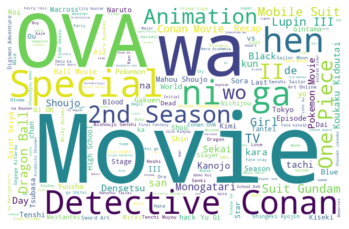

In [15]:
# graph 3: word cloud
text = ""

for instance in instances:
    text += instance["title"] + " "

wordcloud = WordCloud(max_words=200, mode="RGBA", background_color="white", width=700, height=450).generate(text)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

wordcloud.to_file("img/mal_wordcloud.png")

In [16]:
?WordCloud